# [Kaggle Titanic Survival prediction](https://www.kaggle.com/c/titanic)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

sns.set(style="ticks", rc={'figure.figsize':(9,8)})
sns.set_context(rc = {"font.size":15, "axes.labelsize":15}, font_scale=2)
sns.set_palette('colorblind');
from pandas.api.types import CategoricalDtype
# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

Here as we have to predict whether the passenger has survived or not __(0 - Did not survive and 1 - Survived)__. So it is a classification problem.

## Importing training and test set data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (891, 12)
test shape:  (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


Concatenate train and test set to a single dataset after excluding the target column from train dataset.

In [4]:
data = pd.concat([train.loc[:,train.columns!='Survived'], test])
data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S


Dropping __PassengerId__ column from the data table.

In [5]:
data.drop(columns = ['PassengerId'], inplace = True)
train.drop(columns = ['PassengerId'], inplace = True)
data.shape

(1309, 10)

## Data Wrangling

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [7]:
data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

#### Age

- Replacing the Age columns null values with the median value.
- Now as the Age columns shows the actual values so the outliers shown are correct here so I thought the best way to handle them is by rescaling the Age column vales but this gives a distribution where values are limited between the IQR range and the distribution becomes tri-modal distribution.

In [8]:
data['Age'].fillna(data['Age'].median(), inplace = True)
train['Age'].fillna(data['Age'].median(), inplace = True)

In [9]:
data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(), inplace = True)
train['Embarked'].fillna(data['Embarked'].value_counts().idxmax(), inplace = True)

In [10]:
data['Fare'].fillna(data['Fare'].median(), inplace = True)
train['Fare'].fillna(data['Fare'].median(), inplace = True)

In [11]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


## EDA on the dataset

#### 1. Survived - target column

In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

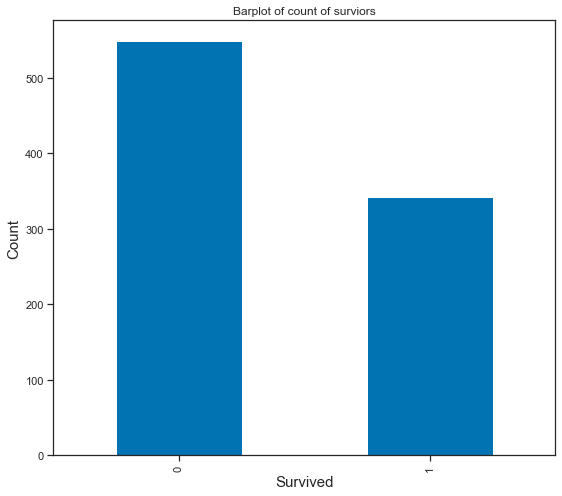

In [13]:
train['Survived'].value_counts().plot(kind = 'bar');
plt.title('Barplot of count of surviors');
plt.xlabel('Survived');
plt.ylabel('Count');

### 2. Pclass


In [14]:
data['Pclass'].nunique()

3

In [15]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

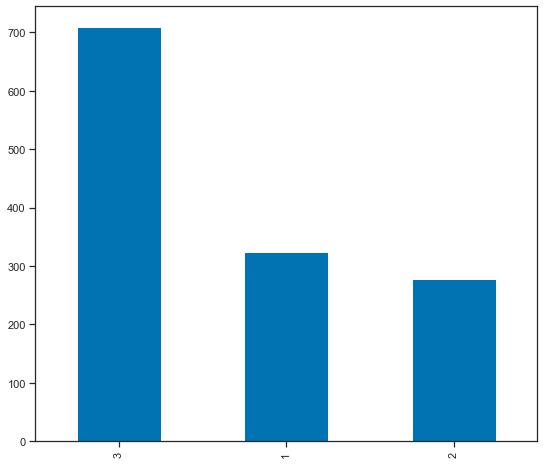

In [16]:
data['Pclass'].value_counts().plot(kind = 'bar');

So most of the passenegers were in the 3rd class.

Checking the survival status of passengers from the different passeneger classes. 

In [17]:
temp = (train.loc[:, ['Pclass', 'Survived']].groupby('Pclass')
 .apply(lambda gd: gd['Survived'].value_counts())).reset_index()

temp.columns = ['Pclass', 'Survived', 'Count']
temp

,Pclass,Survived,Count
0,1,1,136
1,1,0,80
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


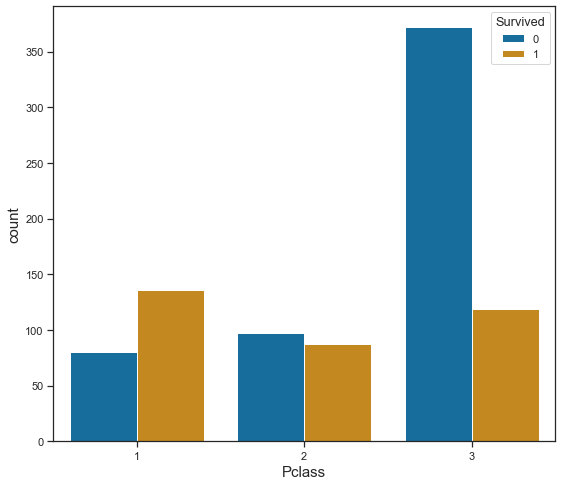

In [18]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived');

It can be seen that Pclass 3 had the maximum count of people who did not survive.

To see the gender of the passenegers who survived.

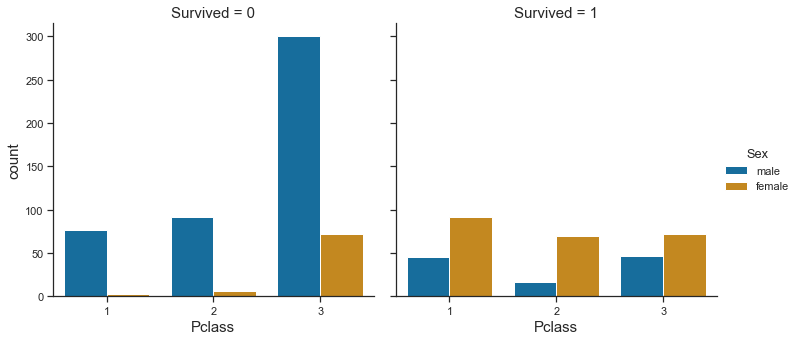

In [19]:
sns.catplot(data = train, x = 'Pclass', hue = 'Sex', col = 'Survived', kind = 'count');

So from the graph we can infer that the female passenegers survival chances were more than that of male passenegrs irrespective of the Pclass.

### 3. Sex

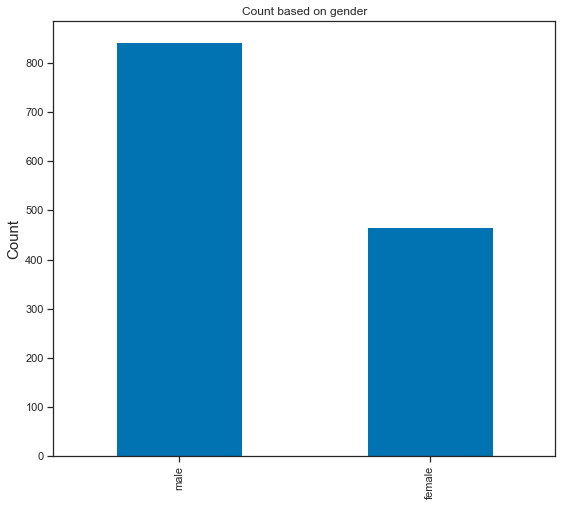

In [20]:
data['Sex'].value_counts().plot(kind = 'bar');
plt.ylabel('Count');
plt.title('Count based on gender');

### 4. Age

In [21]:
data['Age'].min(), data['Age'].max()

(0.17, 80.0)

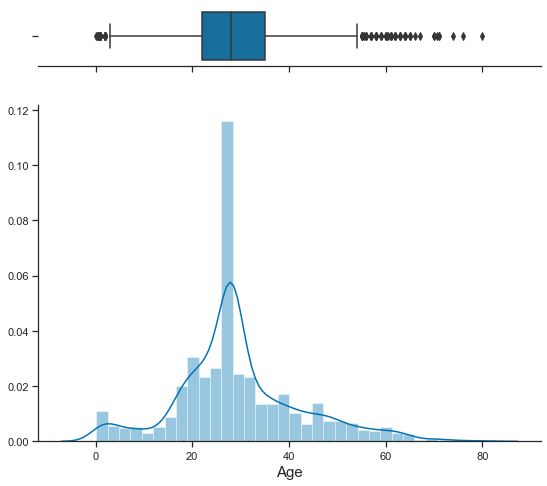

In [22]:
# Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(data['Age'], ax = ax_box)
sns.distplot(data['Age'], ax = ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='');
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True);

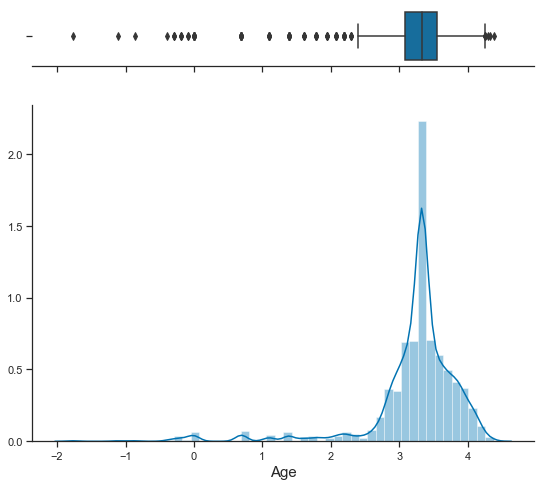

In [23]:
# Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(np.log(data['Age']), ax = ax_box)
sns.distplot(np.log(data['Age']), ax = ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='');
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True);

In [24]:
def replace_outliers(ser):
    # Find Q1 and Q3
    q1 = np.quantile(ser, [0.25, 0.75])[0]
    q3 = np.quantile(ser, [0.25, 0.75])[1]
    ser[ser < q1] = q1
    ser[ser > q3] = q3
    return(ser)

In [25]:
tt = replace_outliers(data['Age'].copy())

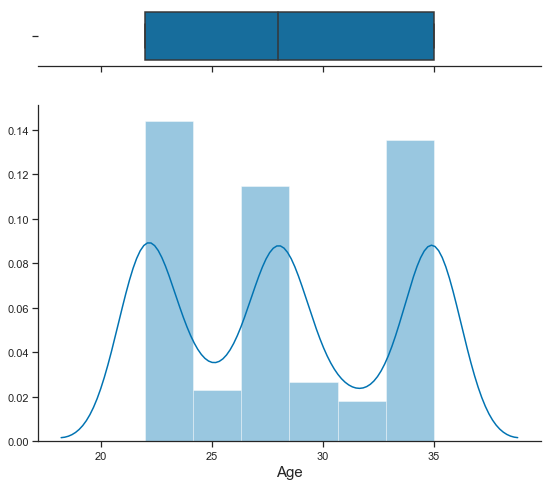

In [26]:
# Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(tt, ax = ax_box)
sns.distplot(tt, ax = ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='');
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True);

In [27]:
tt.min(), tt.max()

(22.0, 35.0)

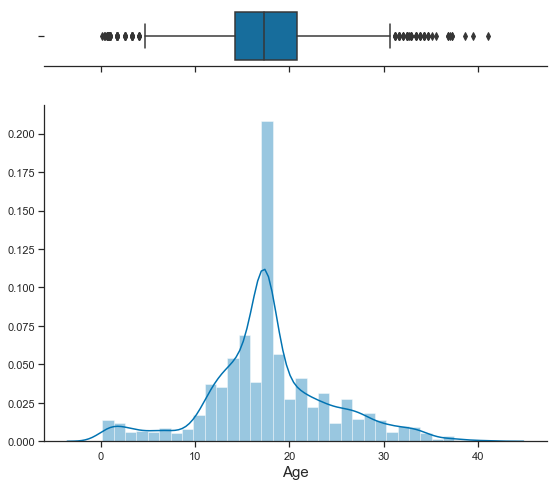

In [28]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
feature = boxcox1p(data['Age'], boxcox_normmax(data['Age'] + 1))

# Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(feature, ax = ax_box)
sns.distplot(feature, ax = ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='');
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True);

### 5. Embarked

In [29]:
data['Embarked'].value_counts(dropna = False)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

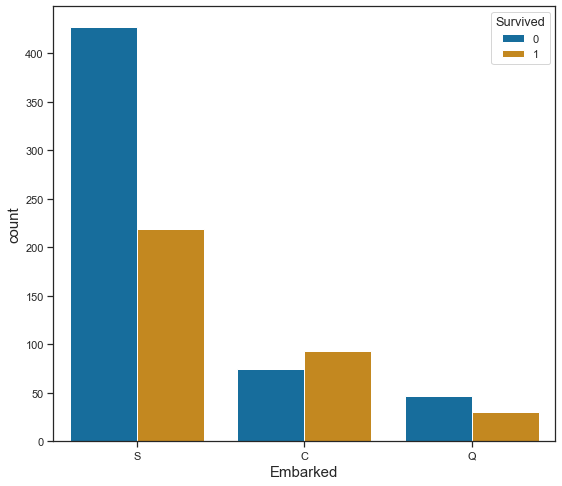

In [30]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

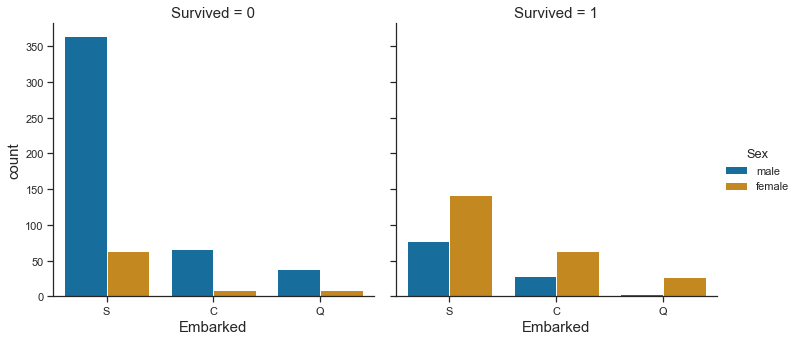

In [31]:
sns.catplot(data = train, x = 'Embarked', col = 'Survived', hue = 'Sex', kind = 'count')

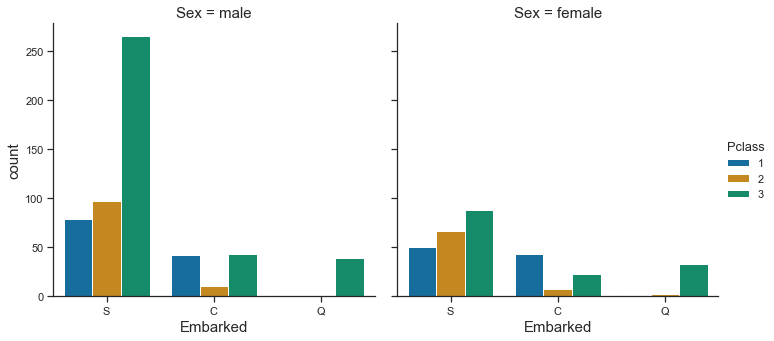

In [32]:
sns.catplot(data = train, x = 'Embarked', hue = 'Pclass', col = 'Sex', kind = 'count');

### 6. Fare

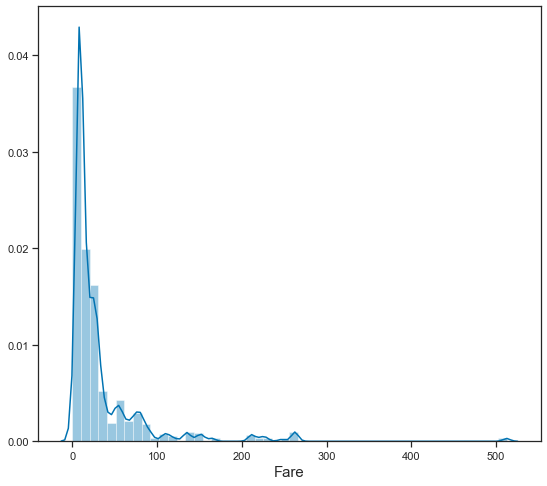

In [33]:
sns.distplot(data['Fare'])

In [34]:
def boxplot_and_histogram_plot(ser):
    # Cut the window in 2 parts
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(ser, ax = ax_box)
    sns.distplot(ser, ax = ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='');
    sns.despine(ax=ax_hist);
    sns.despine(ax=ax_box, left=True);

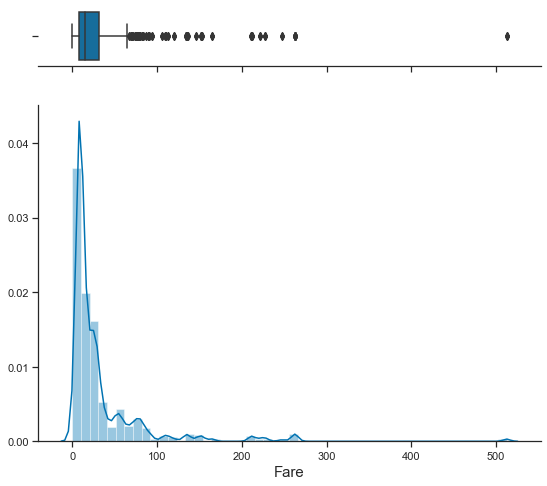

In [35]:
boxplot_and_histogram_plot(data['Fare']);

In [36]:
data['Fare'].max()

512.3292

In [37]:
data['Fare'].skew()

4.3695095504693855

In [38]:
data['Fare'].kurt()

27.04966688871586

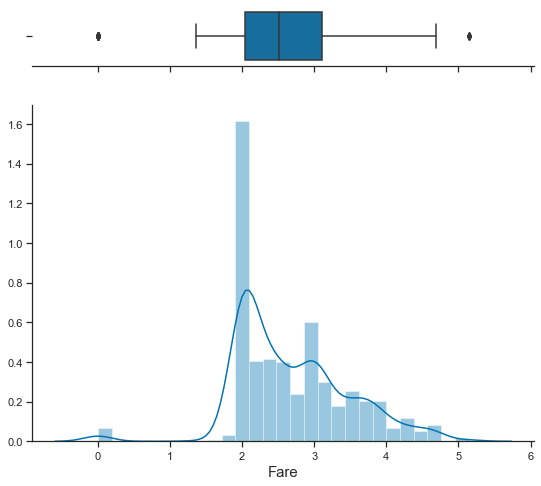

In [39]:
feature = boxcox1p(data['Fare'], boxcox_normmax(data['Fare'] + 1))
boxplot_and_histogram_plot(feature)

### relation between Pclass and Fare

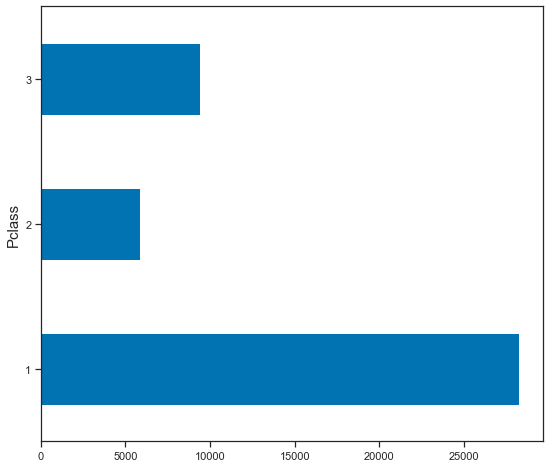

In [40]:
# total Fare received from each class
data.groupby(['Pclass'])['Fare'].sum().plot(kind = 'barh');

So the total fare given by the passengers in Pclass 3 is less than the total fare given by Pclass 1 passengers even though more number of people were in Pclass 3.

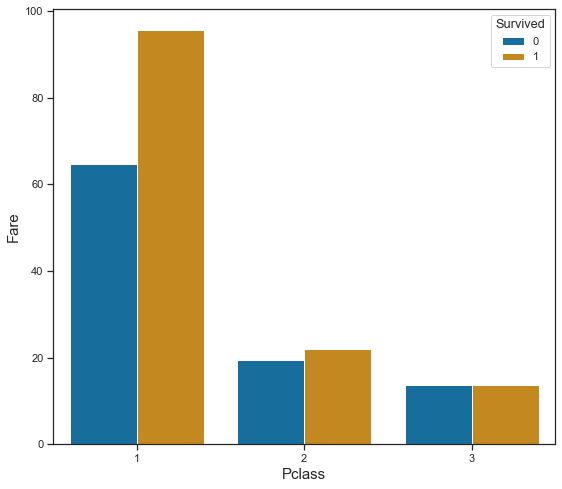

In [41]:
sns.barplot(data = train, x = 'Pclass', y = 'Fare', hue = 'Survived', ci = None)

In [42]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


## 7. sibsp 
Number of siblings / spouses aboard the Titanic

In [43]:
data['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

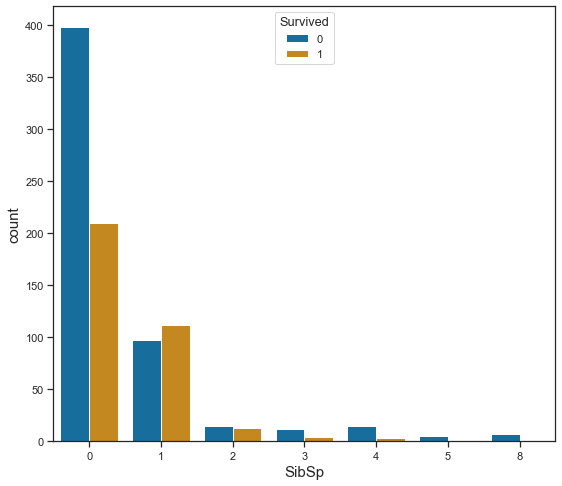

In [44]:
sns.countplot(data = train, x = 'SibSp', hue = 'Survived')

In [45]:
train.groupby('SibSp')['Survived'].value_counts(normalize = True)*100

SibSp  Survived
0      0           65.4605
       1           34.5395
1      1           53.5885
       0           46.4115
2      0           53.5714
       1           46.4286
3      0           75.0000
       1           25.0000
4      0           83.3333
       1           16.6667
5      0          100.0000
8      0          100.0000
Name: Survived, dtype: float64

So there is a bit of impact of people who survived based on the presence of Siblings/Spouses on-board the titanic.

## 8. parch
Number of parents / children aboard the Titanic

In [46]:
data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

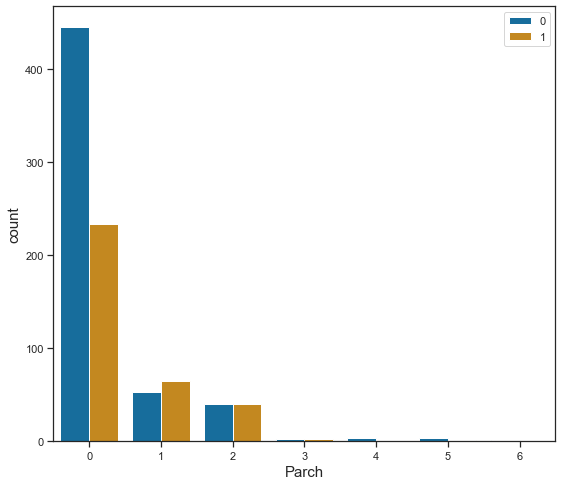

In [47]:
sns.countplot(data = train, x = 'Parch', hue = 'Survived');
plt.legend(loc = 'upper right');

### Cabin

In [48]:
data.loc[data['Cabin'].isnull(),'Cabin'] = 0
data.loc[data['Cabin']!=0,'Cabin'] = 1

train.loc[train['Cabin'].isnull(),'Cabin'] = 0
train.loc[train['Cabin']!=0,'Cabin'] = 1
train['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

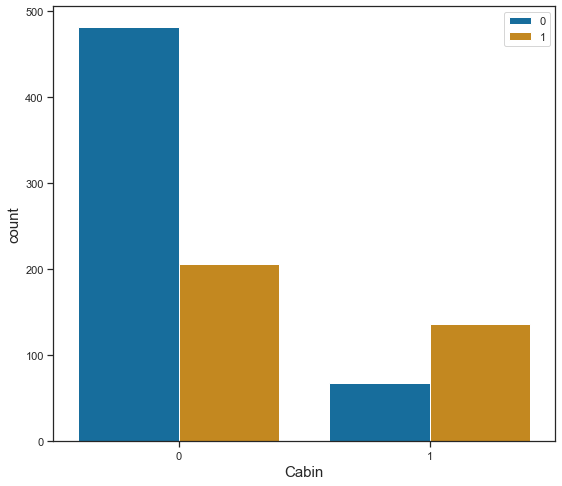

In [49]:
sns.countplot(data = train, x = 'Cabin', hue = 'Survived');
plt.legend(loc = 'upper right');

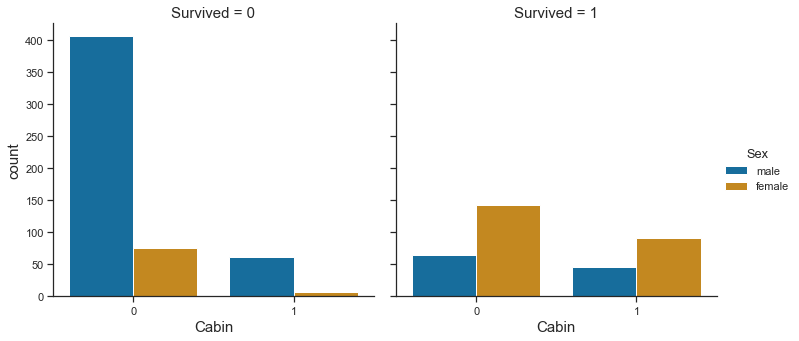

In [50]:
sns.catplot(data = train, x = 'Cabin', col = 'Survived', hue = 'Sex', kind = 'count')

So, it can be seen from the categorical plot above that those people having cabins and that too women have better chances of survival.

In [51]:
data.drop(columns = ['Name', 'Ticket'], inplace = True)
train.drop(columns = ['Name', 'Ticket'], inplace = True)
data.shape

(1309, 8)

### train and test dataset

In [52]:
test = data.iloc[len(train):,:].copy()
print(test.shape)
test.head()

(418, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5000,0,0,7.8292,0,Q
1,3,female,47.0000,1,0,7.0000,0,S
2,2,male,62.0000,0,0,9.6875,0,Q
3,3,male,27.0000,0,0,8.6625,0,S
4,3,female,22.0000,1,1,12.2875,0,S


In [53]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0000,1,0,7.2500,0,S
1,1,1,female,38.0000,1,0,71.2833,1,C
2,1,3,female,26.0000,0,0,7.9250,0,S
3,1,1,female,35.0000,1,0,53.1000,1,S
4,0,3,male,35.0000,0,0,8.0500,0,S


In [54]:
X = train.loc[:, train.columns!= 'Survived'].copy()
y = train['Survived'].copy()
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0000,1,0,7.2500,0,S
1,1,female,38.0000,1,0,71.2833,1,C
2,3,female,26.0000,0,0,7.9250,0,S
3,1,female,35.0000,1,0,53.1000,1,S
4,3,male,35.0000,0,0,8.0500,0,S


## Modelling

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

### Baseline model - Decision tree

Based on the cross validation done, i found that at folds = 3 we have lower value of variance = 0.000353 and f1-score = 0.717 so this can be the best model

| folds | f1-score | variance |
|-------|----------|----------|
| 3     | 0.717    | 0.000353 |
| 5     | 0.713    | 0.000609 |
| 10    | 0.716    | 0.003447 |

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Setup cross validation folds
skf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle=True)

dt_clf = DecisionTreeClassifier(random_state=0)

colT = ColumnTransformer([
    ('categ_encod', OneHotEncoder(drop = 'first'), ['Sex', 'Embarked'])
], remainder = 'passthrough')

dt_pipeline = Pipeline(steps = [('colt', colT), ("dt", dt_clf)])
param_grid = {"dt__max_depth": [3,4,5,6],
              "dt__max_features": [None, 'auto', 'sqrt', 'log2'],
              "dt__criterion": ["gini", "entropy"],
              "dt__min_samples_split": range(6,10)}

grid = GridSearchCV(dt_pipeline, param_grid, verbose = 0, cv = skf, scoring = 'f1')

t0 = time()
grid.fit(X,y)
print("training time: ", round(time()-t0, 3), "s", sep = '')

scores = cross_val_score(grid, X, y, cv = skf, scoring = 'f1')
print('f1-scores: ',scores)
print("f1-score variance of splits: ",scores.var())
print("Avg f1-score: ",scores.mean())

prediction_dt = grid.predict(test)

training time: 13.43s
f1-scores:  [0.7717 0.7258 0.7669 0.6719 0.6667]
f1-score variance of splits:  0.0020123583661651283
Avg f1-score:  0.7205837909639479


In [69]:
grid.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 3,
 'dt__max_features': None,
 'dt__min_samples_split': 6}

In [71]:
test = pd.read_csv('test.csv')

df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = prediction_dt
print(df_output.shape)
df_output.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
df_output.to_csv('submission.csv', index = False)